# Integrated Crisis Early Warning System

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("NEG.csv").convert_dtypes()

### Rows and columns 

In [3]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 15


In [4]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

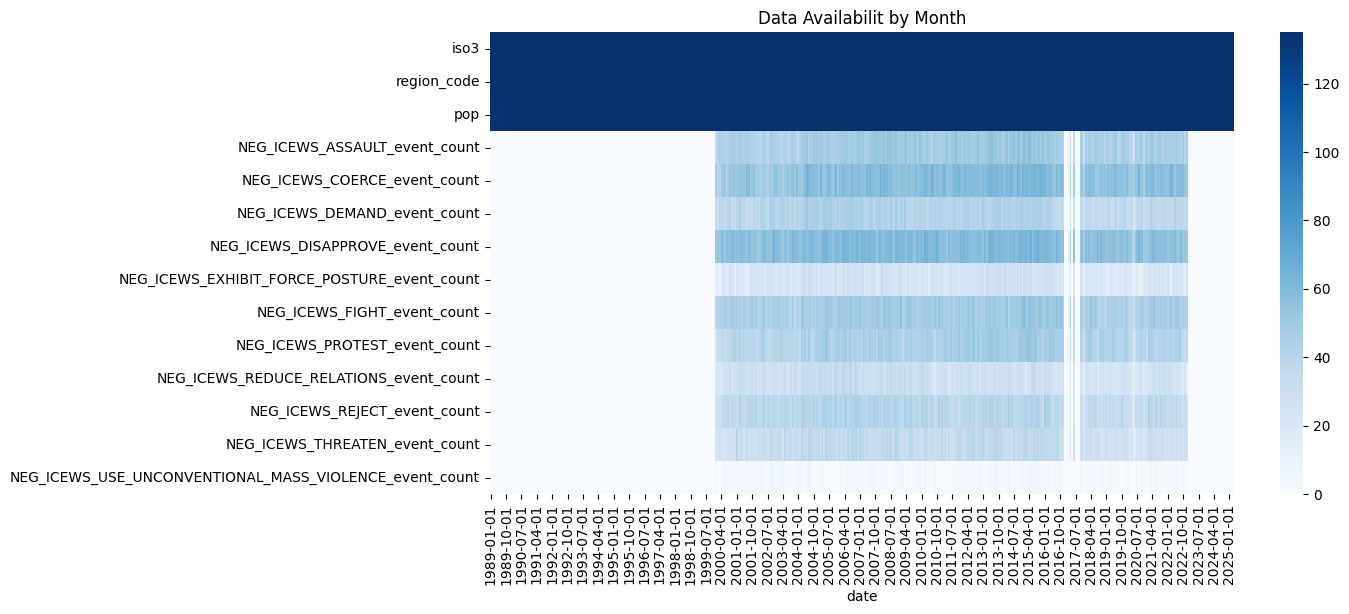

In [5]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

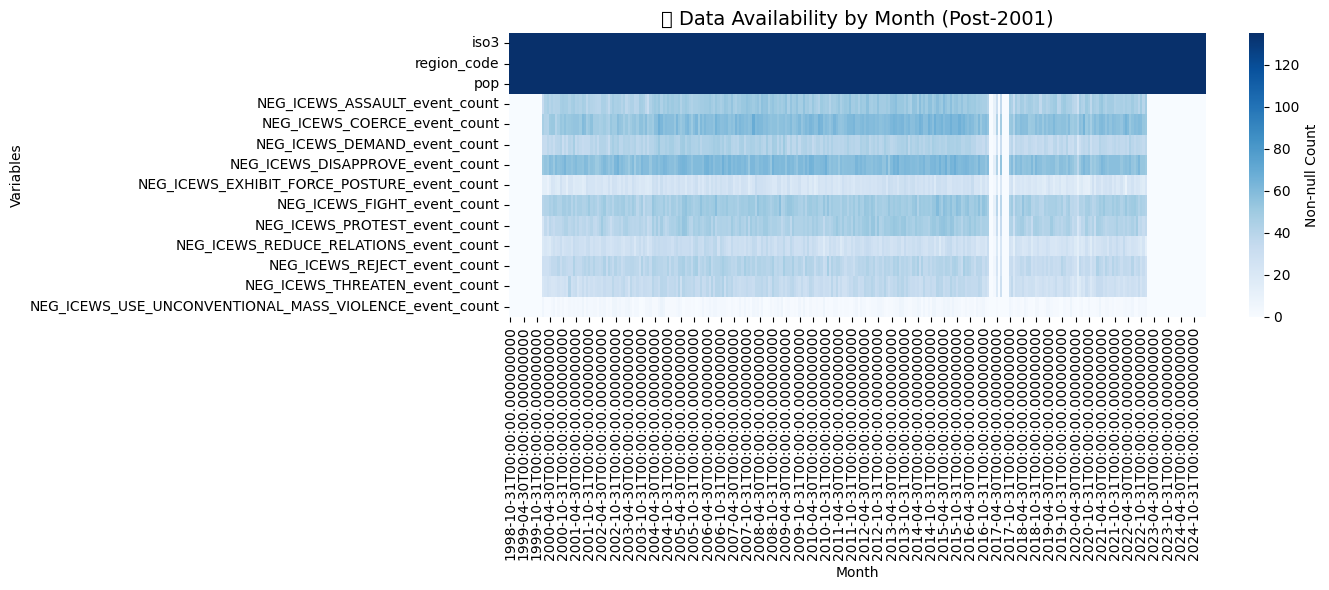

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'yearmon' to datetime format
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce')

# Step 2: Drop rows before 2001
df = df[df['date'] >= pd.to_datetime('1998-10-01')]

# Step 3: Set 'date' as index
df = df.set_index('date').sort_index()

# Step 4: Drop the original 'yearmon' column (optional)
df = df.drop(columns=['yearmon'])

# Step 5: Group by month and count non-null values
missing_by_month = df.groupby(pd.Grouper(freq='M')).count()

# Step 6: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues', cbar_kws={'label': 'Non-null Count'})
plt.title('📅 Data Availability by Month (Post-2001)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()


### Sample data and features

In [8]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,SLE,DOM,SLB,LKA,ZWE
region_code,SSA,LAC,EAP,SAR,SSA
pop,8460512.0,11331265.0,800005.0,22037000.0,16340822.0
NEG_ICEWS_ASSAULT_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_COERCE_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_DEMAND_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_DISAPPROVE_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_EXHIBIT_FORCE_POSTURE_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_FIGHT_event_count,<NA>,<NA>,<NA>,<NA>,<NA>
NEG_ICEWS_PROTEST_event_count,<NA>,<NA>,<NA>,<NA>,<NA>


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42930 entries, 1998-10-01 to 2025-03-01
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   iso3                                                    42930 non-null  string 
 1   region_code                                             42930 non-null  string 
 2   pop                                                     42930 non-null  Float64
 3   NEG_ICEWS_ASSAULT_event_count                           12794 non-null  Int64  
 4   NEG_ICEWS_COERCE_event_count                            15228 non-null  Int64  
 5   NEG_ICEWS_DEMAND_event_count                            10831 non-null  Int64  
 6   NEG_ICEWS_DISAPPROVE_event_count                        15678 non-null  Int64  
 7   NEG_ICEWS_EXHIBIT_FORCE_POSTURE_event_count             6191 non-null   Int64  
 8   NEG_ICEWS_FIGHT_eve

### Descriptive statistics of categorical columns

In [10]:
df.describe(include='string').T

,count,unique,top,freq
iso3,42930,135,AFG,318
region_code,42930,6,SSA,14946


### Descriptive statistics of numerical columns

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,42930.0,44038825.54972,160812133.310186,9451.0,2283769.0,9376444.0,28166393.0,1438069596.0
NEG_ICEWS_ASSAULT_event_count,12794.0,26.306081,62.732316,1.0,2.0,5.0,18.0,772.0
NEG_ICEWS_COERCE_event_count,15228.0,31.018978,135.53467,1.0,2.0,7.0,18.0,2299.0
NEG_ICEWS_DEMAND_event_count,10831.0,10.398947,24.645391,1.0,1.0,3.0,9.0,409.0
NEG_ICEWS_DISAPPROVE_event_count,15678.0,31.010652,111.731596,1.0,2.0,7.0,21.0,2674.0
NEG_ICEWS_EXHIBIT_FORCE_POSTURE_event_count,6191.0,4.938298,8.691206,1.0,1.0,2.0,5.0,327.0
NEG_ICEWS_FIGHT_event_count,12764.0,34.754779,102.395654,1.0,2.0,5.0,23.0,3756.0
NEG_ICEWS_PROTEST_event_count,11735.0,19.94265,71.364083,1.0,2.0,4.0,12.0,2415.0
NEG_ICEWS_REDUCE_RELATIONS_event_count,7547.0,6.026368,13.400188,1.0,1.0,2.0,6.0,662.0
NEG_ICEWS_REJECT_event_count,10208.0,10.083464,25.066665,1.0,1.0,3.0,9.0,381.0


### Deatils of missing values in the features

In [12]:
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage (%)': missing_percent})
missing_df = missing_df.sort_values(by='Missing Percentage (%)', ascending=False)
missing_df

,Missing Count,Missing Percentage (%)
NEG_ICEWS_USE_UNCONVENTIONAL_MASS_VIOLENCE_event_count,42153,98.19
NEG_ICEWS_EXHIBIT_FORCE_POSTURE_event_count,36739,85.58
NEG_ICEWS_REDUCE_RELATIONS_event_count,35383,82.42
NEG_ICEWS_THREATEN_event_count,34196,79.66
NEG_ICEWS_REJECT_event_count,32722,76.22
NEG_ICEWS_DEMAND_event_count,32099,74.77
NEG_ICEWS_PROTEST_event_count,31195,72.66
NEG_ICEWS_FIGHT_event_count,30166,70.27
NEG_ICEWS_ASSAULT_event_count,30136,70.20
NEG_ICEWS_COERCE_event_count,27702,64.53


In [13]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [14]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

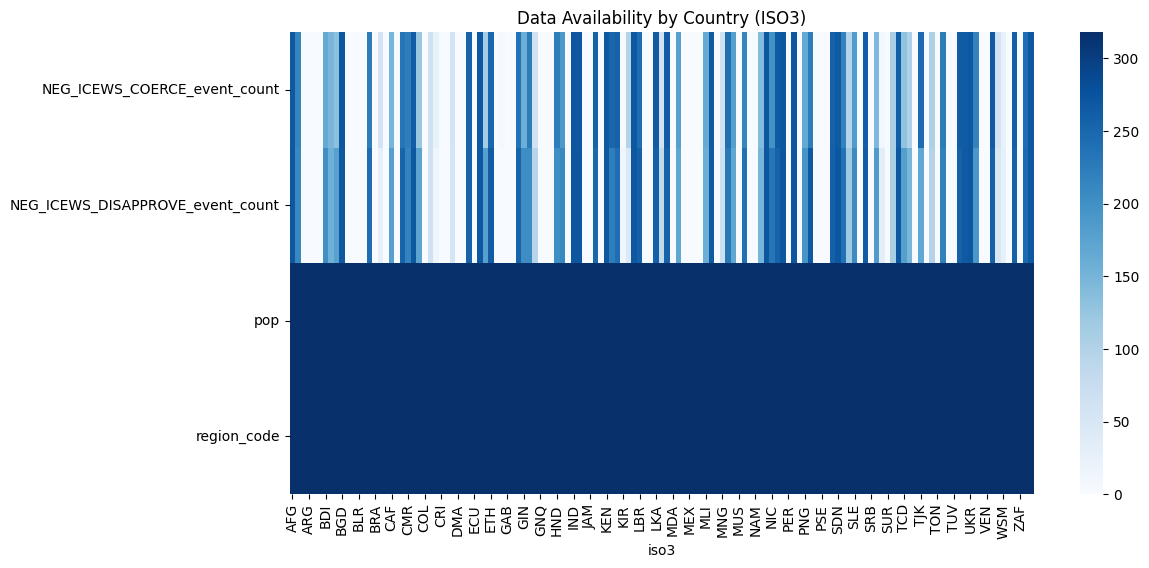

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availability of data by month

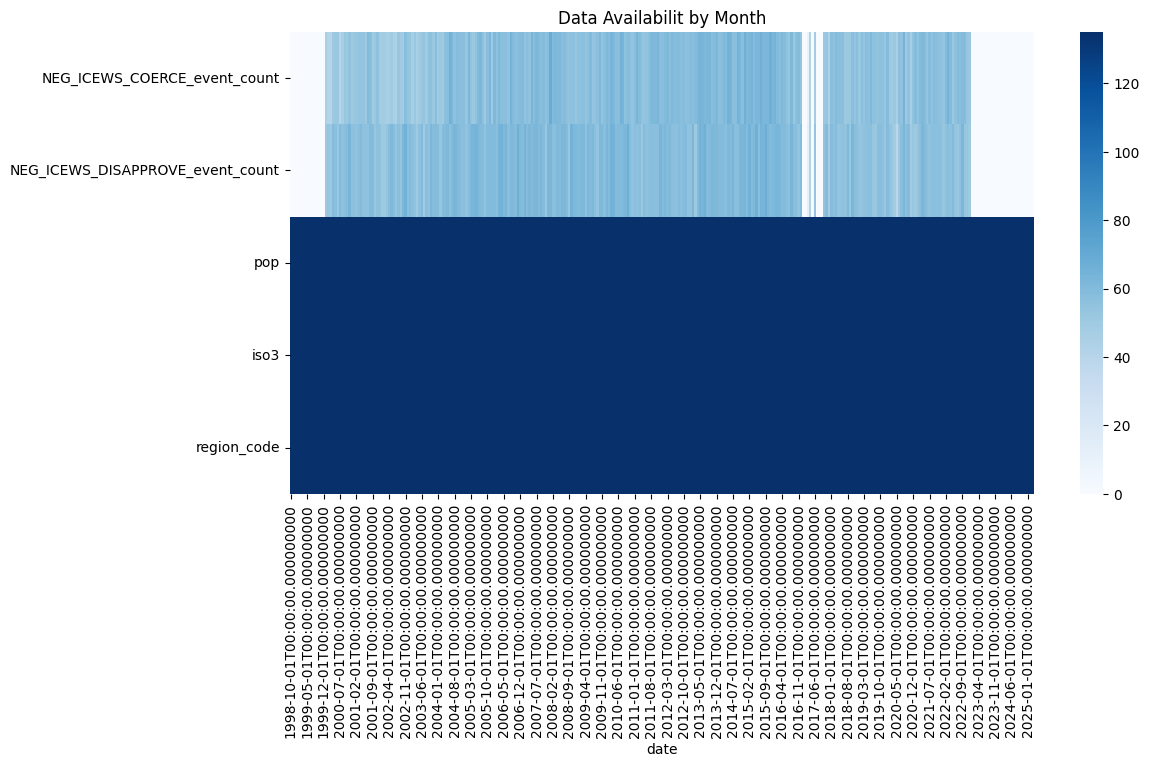

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [17]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

### Correlation between the features

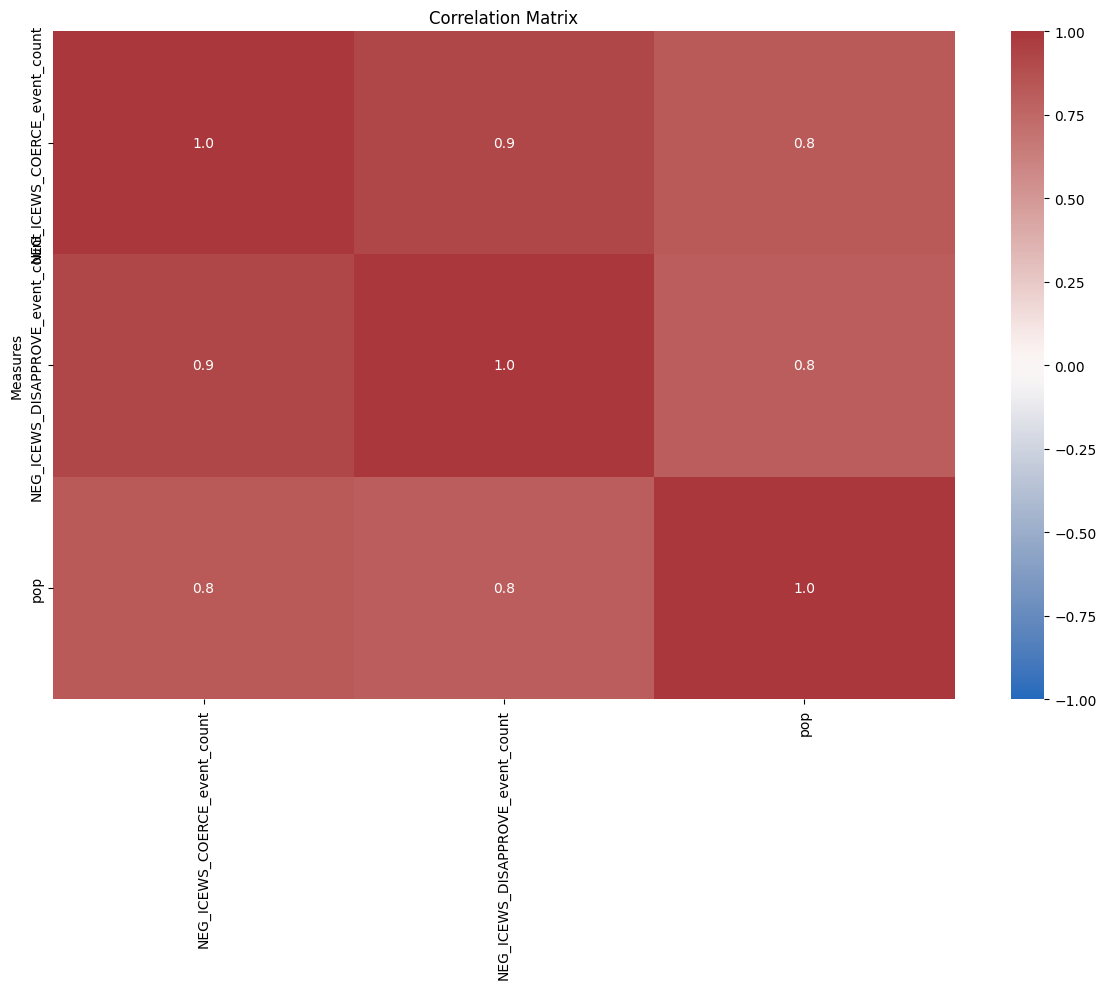

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [19]:
numeric_df.shape

(13444, 3)

### Principal Components Analysis of the features

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)
pca = PCA(n_components=0.75)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

Number of components retained: 1
Column names for PCA components: ['PC1']


In [21]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [22]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

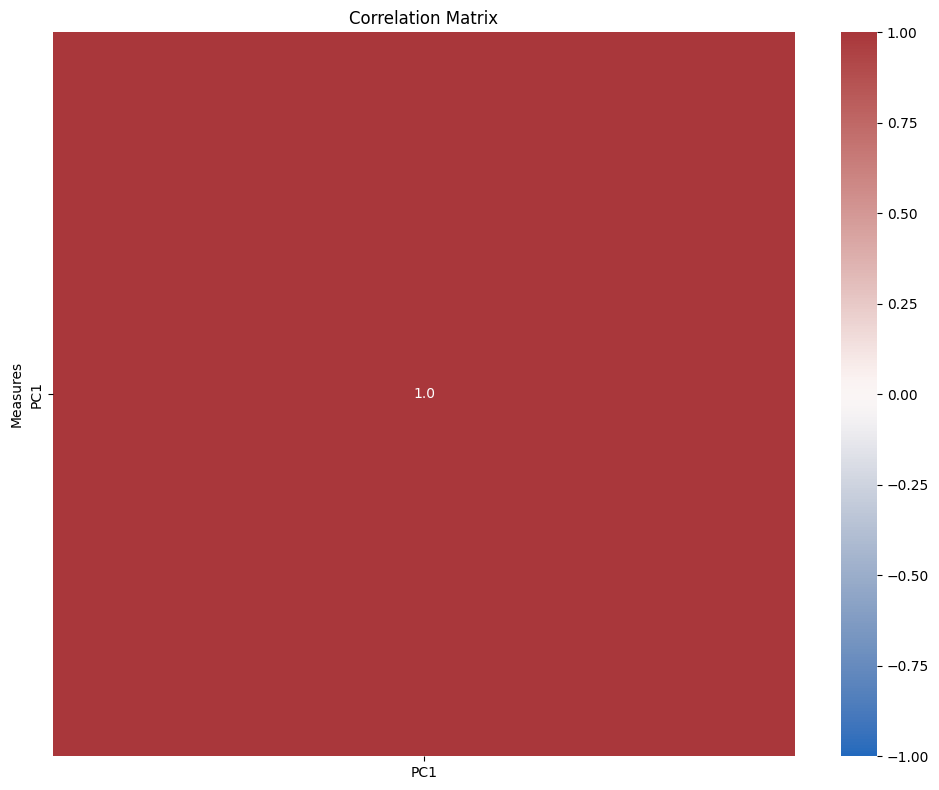

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

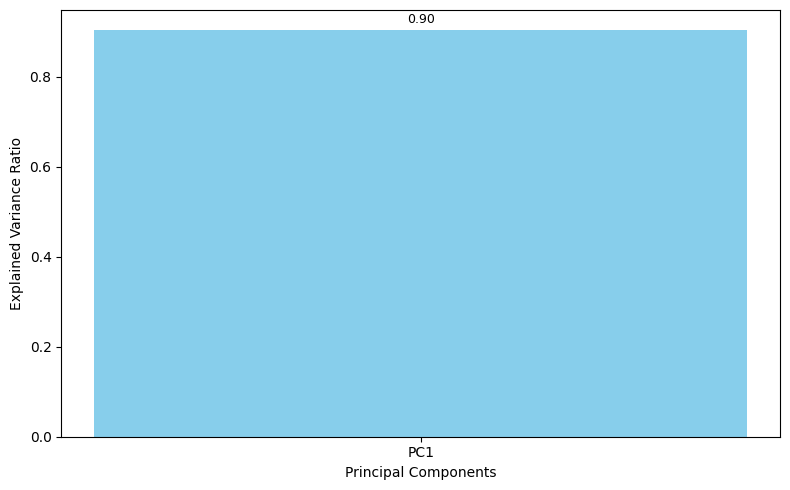

In [24]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

Cumulative explained variance at component 1: 0.9029


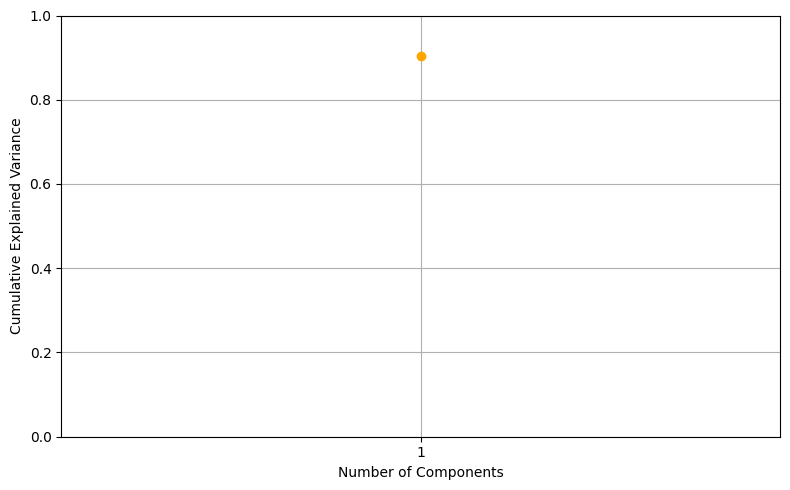

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 1 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

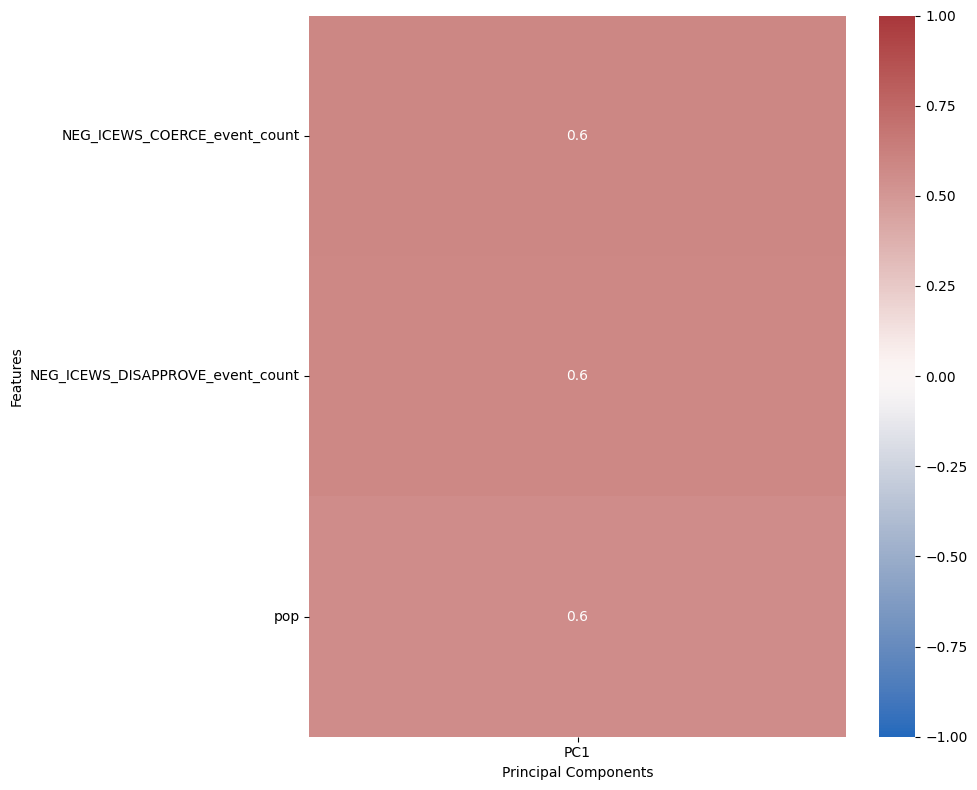

In [28]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [29]:
# Print PCA loadings matrix as plain text
print("🔢 PCA Loadings Matrix:\n")
print(loadings_df.round(2))  # Round to 2 decimal places for readability


🔢 PCA Loadings Matrix:

                                   PC1
NEG_ICEWS_COERCE_event_count      0.59
NEG_ICEWS_DISAPPROVE_event_count  0.58
pop                               0.56


## Physical Interpretation

### PC1- ICEWS Negative- PC1 reflects a strong combination of: Negative political actions (e.g., coercion, disapproval in ICEWS events),and population size. All three features have similar positive loadings, meaning this component increases when all three increase together.